# TP LAB - GRUPO 4

## TEORIA MODERNA DE FLTROS

Implementar un fltro de máxima planicidad. 
Pasa Altos, que tenga una atenuación en la banda de paso de 1dB y en la banda de rechazo de 10dB.
Con una frecuencia límite de la banda de paso de 22kHz, y en la banda eliminación de 8.2kHz. 
</br>
Considere una ganancia de 18dB en la banda de paso.

1. Grafique la plantilla con los requisitos del diseño. 

   Indique los valores asumidos.  

   Grafique la función de aproximación ajustada a los límites de la plantilla.

Para realizar la plantilla utilizamos los siguintes valores:

$\alpha_{max} = 1 $ dB    
$\omega_{p} = 2 \pi * 22000$  rad/s
 
$\alpha_{min} = 10$ dB   
$\omega_{s} = 2 \pi * 8200$  rad/s

$G_{bp} =18$ dB

Para el requerimiento de 18db en la banda de paso, vamos a plantear el uso de una etapa de ganacia al final del filtro, de manera de realizar todo el diseño referido a una $G_{bp}$.


### normalizamos la plantilla:

In [43]:
print("Ws " + str(w_s) + " Hz")
print("Wp " + str(w_p) + " Hz")

Ws 51522.119518872605 Hz
Wp 138230.07675795088 Hz


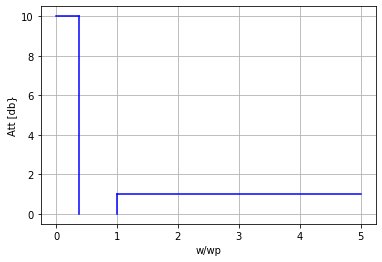

In [44]:
# Grafica de la plantilla 

import numpy as np
import math as m
import matplotlib.pyplot as plt

# Requerimientos: 
# atenuaciones
alpha_min = 10 
alpha_max = 1 

# w de paso y stop
w_p = 2 * m.pi * 22000
w_s = 2 * m.pi * 8200

# Normalizamos respecto a wp
w_pn = w_p/w_p 
w_sn = w_s/w_p

# lineas para la banda de paso y stop
bpn = np.linspace(w_pn, 5*w_pn)
bsn = np.linspace(0, w_sn)  

# Lineas verticales adicionales
ref_bp_max = np.linspace(0,alpha_max)
ref_bp_min = np.linspace(0,alpha_min)

# Plantilla de atenuación Pasa Altos normalizada
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w/wp')
ax.grid(True)
ticks = range(0, 11 )
ax.set_xticks(ticks)

ax.plot(bpn, [alpha_max] * len(bpn), '-b')
ax.plot(bsn, [alpha_min] * len(bsn), '-b')
ax.plot([w_pn] * len(ref_bp_max), ref_bp_max, '-b')
ax.plot([w_sn] * len(ref_bp_min), ref_bp_min, '-b')

plt.show()


2. Obtener el orden del filtro en forma analítica. 

   Verificar utilizando matlab.

### Obtener la plantilla equivalente del filtro pasabajos prototipo:

In [45]:
wp_lp = 1 / w_pn
ws_lp = 1 / w_sn

print(f'wp_lp = {wp_lp}, ws_lp = {ws_lp}')

wp_lp = 1.0, ws_lp = 2.6829268292682924


### Determinamos  $\epsilon$ y el orden N del filtro

$ \epsilon = \sqrt{10^{0.1\alpha_{max}} - 1} $


$ N = \frac{log(\frac{10^{0.1\alpha_{min}} - 1} { E^{2} } )}{2 log(w_s)} $  

In [46]:
alpha_max = 1    # dB
alpha_min = 10   # dB

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.log10((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(epsilon, 2))) / (2 * m.log10(ws_lp))

print(f' $\epsilon$: {epsilon}, N = {N}, N => {m.ceil(N)}')

 $\epsilon$: 0.5088471399095875, N = 1.797755589209243, N => 2


3. Obtención de las expresiones que representan el módulo, fase y retardo de grupo para la estructura diseñada. 

   Deben constar en el informe todos los pasos utilizados en el proceso.

4. Realice el diagrama de polos-ceros.

5. Utilizando MATLAB, obtener la gráfica de respuesta en frecuencia (módulo y fase) correspondiente a cada filtro requerido, así como la gráfica del retardo de grupo que introduce.

6. Diseñe el filtro utilizando una topología tipo Variable de estado (KHN).

7. Utilizando herramientas de simulación (Electronic Workbench, Multisim, Tina, LTspice, etc.) obtenga la transferencia de los filtros requeridos y verifique que cumple con lo pedido. Realice la simulación con componentes ideales (R, L, C, AOs), y luego reemplácelos por los que utilizará en el armado (R, L, C con los valores comerciales, y el modelo del AO a utilizar). Identifique las diferencias en ambas simulaciones, si las hay, y trate de justificarlas.

8. Utilizando componentes comerciales, arme el circuito y mida las transferencias simuladas. Realice las gráficas de Bode (módulo y fase), y del retardo de grupo introducido por el filtro. Verifique que cumple con los requerimientos. Explique las diferencias, si las hay

9. Indique el “setup” utilizado en la medición (tipo y modelo del instrumental utilizado, diagrama o fotografías de conexionado).

10. Conclusiones. Las mismas deben incluir los problemas con los que se han encontrado a lo largo del proceso de diseño, simulación, armado y medición. Se deben incluir las referencias que les permitieron encontrar las soluciones (notas de aplicación, hojas de datos, páginas de Internet, mails de consulta, etc.). Indique si ha encontrado diferencias en el uso de las topologías sugeridas.